In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

%matplotlib inline

In [3]:
matplotlib.rcParams['figure.figsize'] = (12, 10) # set default figure size, 8in by 6in

# The Curse of Dimensionality

# Main Approaches for Dimensionality Reduction

## Projection

## Manifold Learning

# Principal Component Analysis (PCA)

First I'll create a random data set that looks similar to textbook 8-7 by generating data that is randomly
distributed on two features, then we rotat it 45 degrees using a linear algebra transformation.

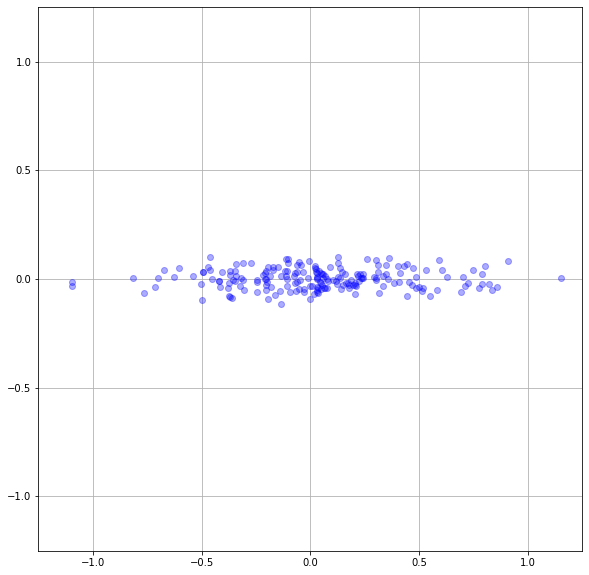

In [16]:
# number of samples to generate
m = 200

# array to hold randomly generated data
X = np.empty((m, 2))

# standard deviation of x_1 dimension is large
x_1_scale = 0.4
X[:,0] = np.random.normal(loc=0.0, scale=x_1_scale, size=m)

# standard deviation of x_2 dimension is small
x_2_scale = 0.05
X[:,1] = np.random.normal(loc=0.0, scale=x_2_scale, size=m)

# show the results so far
plt.plot(X[:,0], X[:,1], 'bo', alpha=0.33)
plt.xlim(-1.25, 1.25)
plt.ylim(-1.25,1.25)
plt.gca().set_aspect('equal', adjustable='box')
plt.grid();

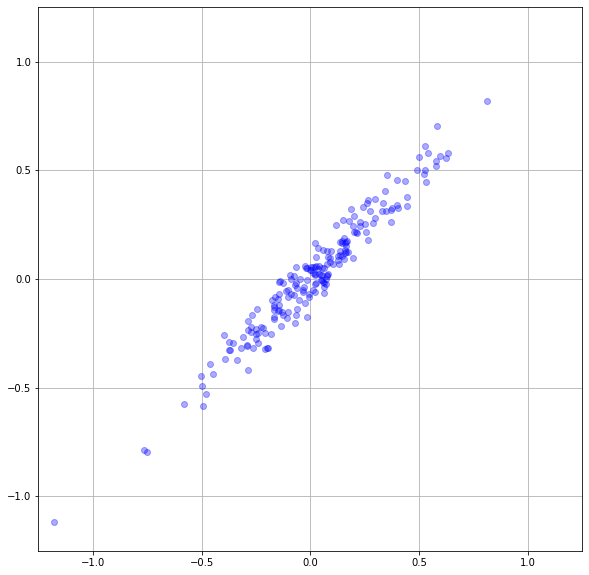

In [17]:
# use a little linear algebra, create a rotation matrix and use it to rotate 45 degrees
theta = np.radians(-45)
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c,-s), (s, c)))

# will rotate points by the degrees given
X = np.dot(X, R)

# show the results after rotation
plt.plot(X[:,0], X[:,1], 'bo', alpha=0.33)
plt.xlim(-1.25, 1.25)
plt.ylim(-1.25,1.25)
plt.gca().set_aspect('equal', adjustable='box')
plt.grid();

In [18]:
# apply PCA,project to 2 dimensions, but this will undo the rotation
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2d = pca.fit_transform(X)

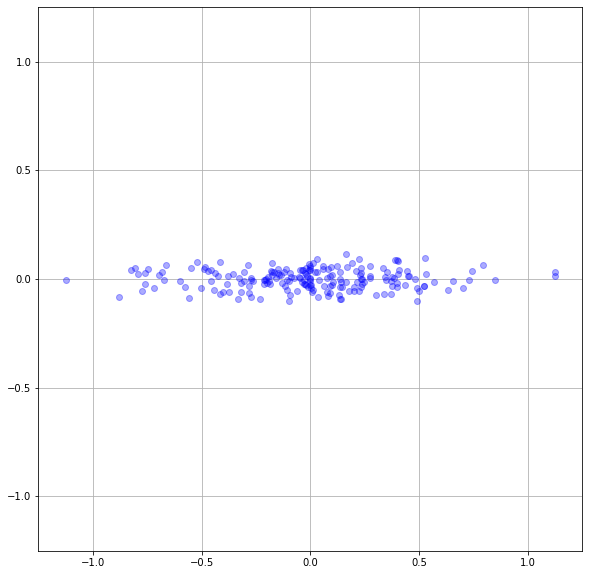

In [20]:
# show the results after PCA,
plt.plot(X2d[:,0], X2d[:,1], 'bo', alpha=0.33)
plt.xlim(-1.25, 1.25)
plt.ylim(-1.25,1.25)
plt.gca().set_aspect('equal', adjustable='box')
plt.grid();

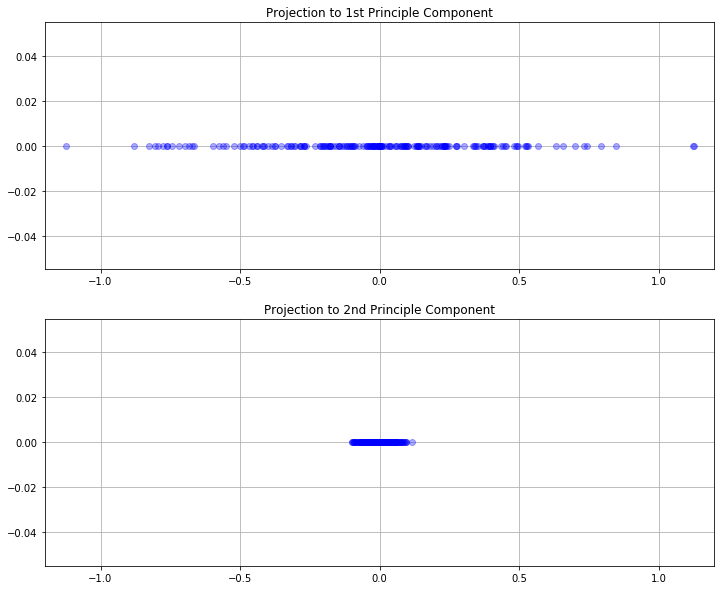

In [30]:
# we can use the .components_ to access the principle component projections
# visualze first principle component project to a 1D hyperplane (to a line)
plt.subplot(2,1,1)
plt.plot(X2d[:,0], np.zeros(m), 'bo', alpha=0.33)
plt.xlim(-1.2, 1.2)
plt.title("Projection to 1st Principle Component")
plt.grid();

# visualze second principle component project to a 1D hyperplane (to a line)
plt.subplot(2,1,2)
plt.plot(X2d[:,1], np.zeros(m), 'bo', alpha=0.33)
plt.xlim(-1.2, 1.2)
plt.title("Projection to 2nd Principle Component")
plt.grid();